# **Project Name - Flipkart Customer Service Satisfaction**

# **Project Summary -**

This project aims to classify Customer Satisfaction Scores (CSAT) from Flipkart uto identify key factors influencing customer experiences and 
service quality. CSAT is a critical metric for evaluating service quality and customer experience. By analyzing past interactions, agent behavior, customer 
remarks, and ticket resolution times, we build a classification model to predict the level of customer satisfaction (1 to 5). This model will help 
proactively identify areas needing improvement and optimize support workflows.By leveraging python ,pandas,numpy ,matplotlip,seaborn and 
scikit-kearn the project aims at covering trends in customer sentiments,improve support strategies,and enhance overall satisfaction



# **GitHub Link -**

# **Problem Statement**

**In today's competitive environment, delivering exceptional customer support is critical to retaining customers and sustaining business growth. 
Organizations rely heavily on Customer Satisfaction Scores (CSAT) to evaluate their support effectiveness and service quality. However, 
collecting CSAT feedback post-interaction is reactive and often too late to intervene in the customer experience process.**

**This project aims to analyse customer interactions and feedbacck to identify drivers of satisfaction,enabling Flipkart to optimize support 
strategies,enhance service efficiency, and boost customer loyalty in a competetive market.**

# **1.Know Your Data**

### **Import Libraries**

In [12]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score 


# **Dataset Loading**

In [10]:
#load dataset

df=pd.read_csv("C:/Users/HP/Downloads/Customer_support_data.csv")
df

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


# **Dataset first View**

In [13]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


# **Dataset row and columns count**

In [14]:
df.shape

(85907, 20)

# **Dataset information**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

## **Dataset Description**

In [16]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


# **Duplicate Values**

In [17]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

0


# **Missing/null values**

In [18]:
# Missing Values/Null Values Count
df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

## **Visualize Missing and Valid Data Counts**

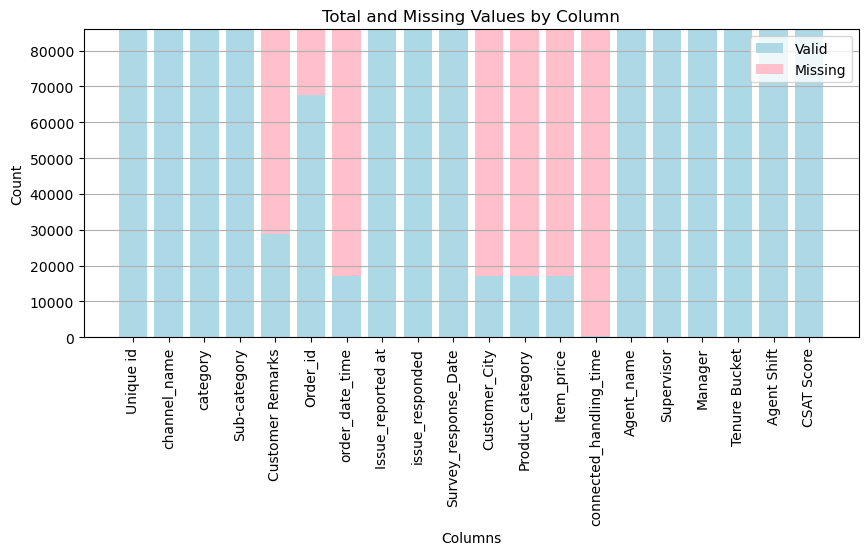

In [19]:
# Calculate total and missing counts for each column
total_counts = len(df)
missing_counts = df.isnull().sum()

# Calculate valid counts by subtracting missing from total
valid_counts = total_counts - missing_counts

# Plot the stacked bar chart for valid and missing values
plt.figure(figsize=(10, 4))
plt.bar(missing_counts.index, valid_counts, label='Valid', color='lightblue')  # Plot valid counts
plt.bar(missing_counts.index, missing_counts, bottom=valid_counts, label='Missing', color='pink')  # Plot missing counts on top

# Add title and labels to the plot
plt.title('Total and Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()  # Add a legend to differentiate between valid and missing
plt.grid(axis='y')  # Add horizontal grid lines

plt.show()


### What did you know about your dataset?

 **1. The dataset contains 85907  rows and 20 columns** 

**2.There are no duplicates**

**Following 7 columns have some missing values**

Customer Remarks           57165

Order_id                   18232

order_date_time            68693

Customer_City              68828

Product_category           68711

Item_price                 68701

connected_handling_time    85665


# **Understanding Your Variables**

In [20]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

## **Variables Description**

Variable Name--------------Description

Unique id------------------Unique identifier for each support ticket.	

channel_name--------------- Communication channel used (e.g., Email, Chat, Phone).	


category--------------------Broad issue type (e.g., Technical, Billing, Account).	

Sub-category---------------	Specific issue under category (e.g., "Login Failure" for Technical).	

Customer Remarks-------------Free-text feedback from customers about their issue.	

Order_id---------------------ID of the associated order.	

order_date_time--------------Timestamp of the order placement.	.

Issue_reported at------------Timestamp when the issue was reported.	

issue_responded---------------Timestamp when the agent responded.	

Survey_response_Date-------------Date when CSAT feedback was provided.	

Customer_City-------------------City of the customer.	.

Product_category----------------Type of product involved (e.g., Electronics, Clothing).

Item_price----------------------Price of the item involved.

connected_handling_time---------Time (in seconds) spent by the agent resolving the issue

Supervisor----------------------Agent’s supervisor

Manager-----------------------	Manager overseeing the support process.

Tenure Bucket-------------------Agent experience level (e.g., 0–6 months, 6–12 months).

Agent Shift-------------------	Shift when the ticket was handled (e.g., Day, Night).

CSAT Score----------------------Target Variable: Customer satisfaction score (1–5, 1 = very dissatisfied).

**Check Unique Values for each variable**

In [21]:
df.nunique()

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

# **Data Wrangling**

In [22]:
# Convert date columns to datetime type
datetime_cols = ['Issue_reported at', 'issue_responded', 'Survey_response_Date']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True, infer_datetime_format=True)

# Create a new feature for response time in minutes
df['Time difference'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

#remove columns that have a lot of null values
rem_columns=['order_date_time','Customer Remarks','connected_handling_time']
existing_columns_to_remove=[col for col in rem_columns if col in df.columns]

if existing_columns_to_remove:
    df=df.drop(columns= existing_columns_to_remove)
    print('existing colmns are removed')
else:
    print('None of the specified columns are in dataframe or are alraedy removed')

# Drop rows with missing values in the CSAT Score (target variable)
df = df.dropna(subset=['CSAT Score'])


existing colmns are removed


In [23]:
# Drop rows with missing values in the CSAT Score (target variable)
df = df.dropna(subset=['CSAT Score'])

In [24]:
df.isnull().sum()

Unique id                   0
channel_name                0
category                    0
Sub-category                0
Order_id                18232
Issue_reported at           0
issue_responded             0
Survey_response_Date        0
Customer_City           68828
Product_category        68711
Item_price              68701
Agent_name                  0
Supervisor                  0
Manager                     0
Tenure Bucket               0
Agent Shift                 0
CSAT Score                  0
Time difference             0
dtype: int64

### Manipulations done and insights found

Columns with execessive null values have been removed.So csat score depend on the remaining values.Date format has been changed to 
appropriate format.

# **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Chart 1**

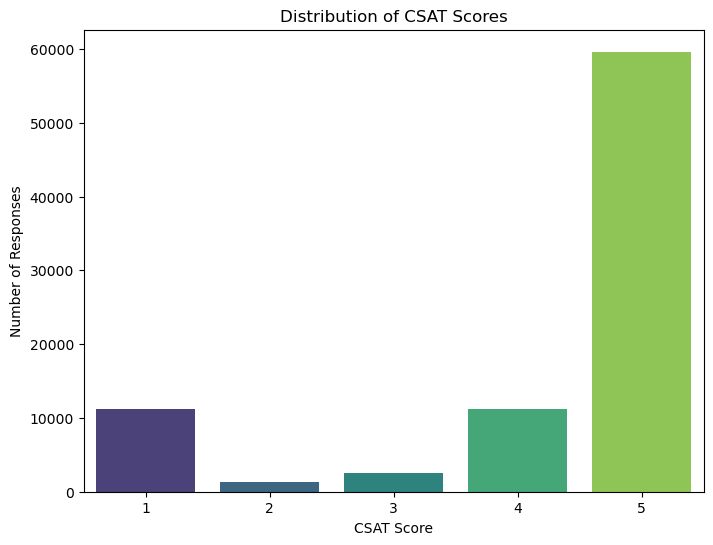

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="CSAT Score", palette='viridis')

# Add title and labels to the plot
plt.title("Distribution of CSAT Scores")
plt.xlabel("CSAT Score")
plt.ylabel("Number of Responses")

# Display the plot
plt.show()

The bar chart was chosen because it effectively displays the distribution of Customer Satisfaction (CSAT) scores in a clear and easily 
interpretable manne

Channels like emails have high csat scorescompared to others like Phone 

**Will the gained insighs help creating positive business impact?**

Are there any insights leading to negative growth? Justify with specific reason

Understanding that most customers are very satisfied can guide the business to maintain existing practices while focusing on areas of 
improvement for lower scores. This insight can enhance customer satisfaction strategies

**Chart 2**

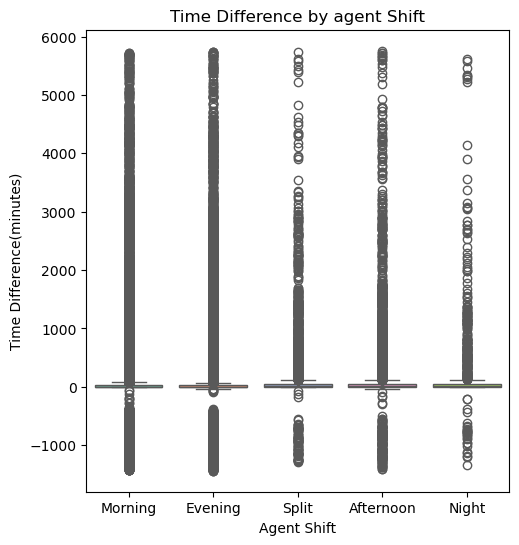

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Agent Shift', y='Time difference', palette='Set2')
plt.title("Time Difference by agent Shift")
plt.xlabel("Agent Shift")
plt.ylabel("Time Difference(minutes)")

plt.show()

The box plot showing Time difference by Agent shift provides a visual summary of the distribution of time difference for each shift.It shows 
variability of data,outliers etc.

Morning might show a narrower iqr and a lower median time difference ,suggesting more consistent and quicker response times

**Will the gained insighs help creating positive business impact?**

Are there any insights leading to negative growth? Justify with specific reason

Yes it can be found that morning are peak production time from this or moe people wwwork in mornings.

**Chart 3**

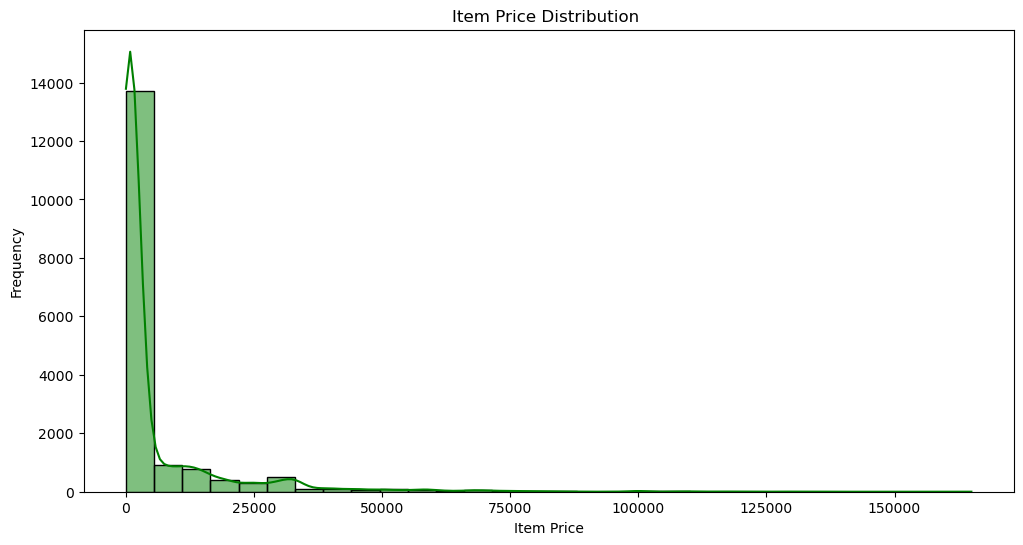

In [27]:
plt.figure(figsize=(12, 6))

# Plot histogram with a log-scaled x-axis for better visualization of item price distribution
sns.histplot(data=df, x="Item_price", bins=30, kde=True,color='green')

# Add a title and label the x-axis
plt.title("Item Price Distribution ")
plt.xlabel("Item Price")
plt.ylabel('Frequency')
# Display the plot
plt.show()

The histogram with a frequencyis perfect for visualizing a wide range of item prices, highlighting the distribution and skewness effectively.

The majority of products are low-priced ie. less than 2500 with a steep decline as prices increase, showing a right-skewed distribution.

**Will the gained insighs help creating positive business impact?**

Are there any insights leading to negative growth? Justify with specific reason

Not really

**Chart 4**

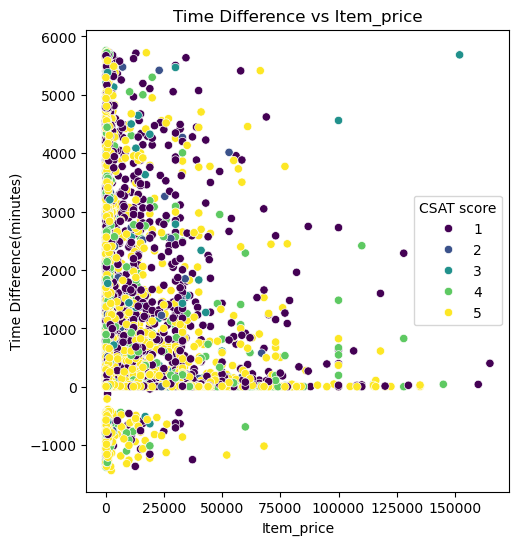

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Item_price', y='Time difference', palette='viridis',hue='CSAT Score')
plt.title("Time Difference vs Item_price")
plt.xlabel("Item_price")
plt.ylabel("Time Difference(minutes)")
plt.legend(title='CSAT score')
plt.show()

Visualises the relatinship between time difference and item price, by using csat scores as the hue it adds a layer of information,showing 
customer satisfaction scores vary with these two variables.

Can see if the pattern in customer satisfaction relative to the time difference and item price

**Will the gained insighs help creating positive business impact?**

Are there any insights leading to negative growth? Justify with specific reason

Understand the relationship between response ties and item prices can help in identifying areas for improvement.

**Chart**

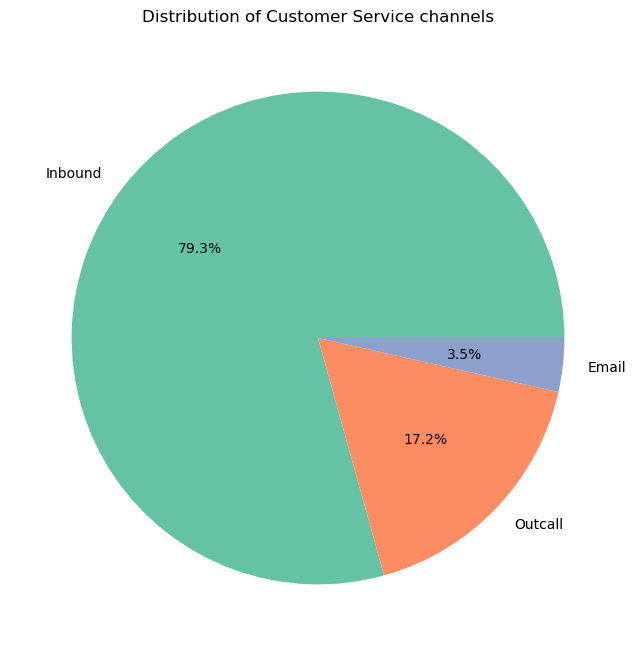

In [20]:
channel_counts=df['channel_name'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(channel_counts,labels=channel_counts.index,autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Distribution of Customer Service channels')
plt.show()

The pie chart provides a clear visual representation of the distribution of different customer service channels in the dataset

It helps to understand which channels are most and least used by customers that is inbound

**Will the gained insighs help creating positive business impact?**

Are there any insights leading to negative growth? Justify with specific reason

yes.It helps in planning and optimising customer service operations base on channel usage trends.

**Chart 6**

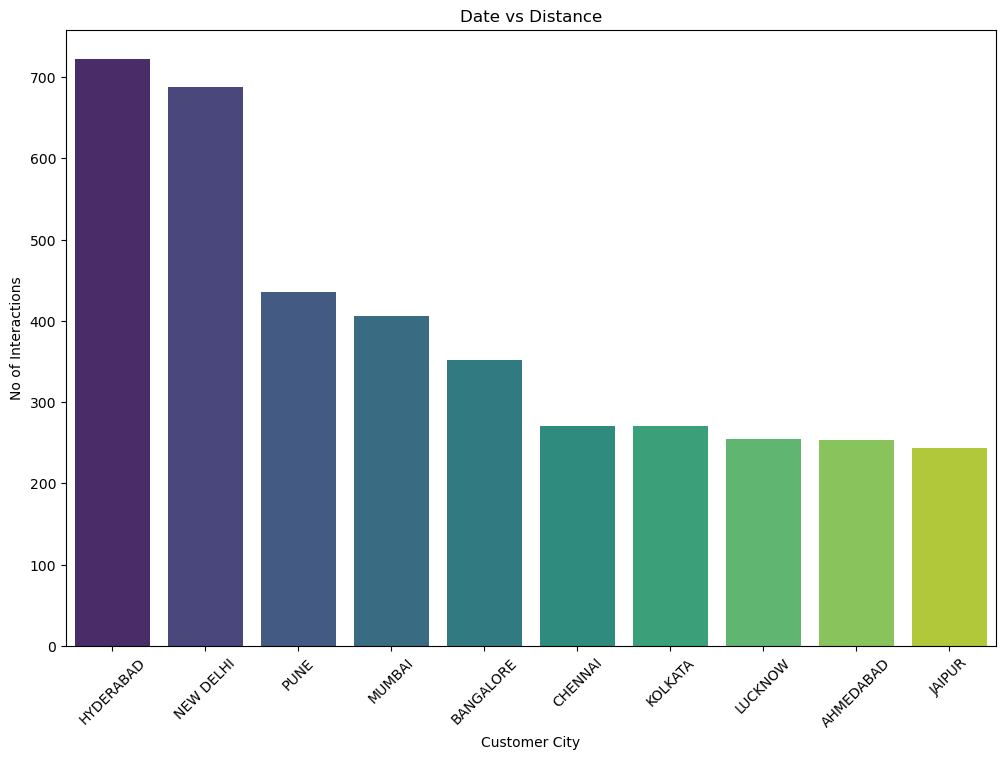

In [21]:
top_cities=df['Customer_City'].value_counts().head(10)
plt.figure(figsize=(12,8))
sns.barplot(x=top_cities.index,y=top_cities.values, palette='viridis')
plt.xticks(rotation=45)
plt.title( 'Date vs Distance')
plt.xlabel('Customer City')
plt.ylabel('No of Interactions')
plt.show()

In [ ]:
The bar chart provides a visual representation of the number of interactions of feedback,recieved from the top 10 cities.This helps in 
understanding the distribution of customer service requests.

In [ ]:
Hyderabad is the city from where most of the customers require customer support,closely followed by New Delhi.

**Will the gained insighs help creating positive business impact?**

Are there any insights leading to negative growth? Justify with specific reason

Yes.By finding the cities from where most requests are acquired,much support would be given there.

**Chart 7**

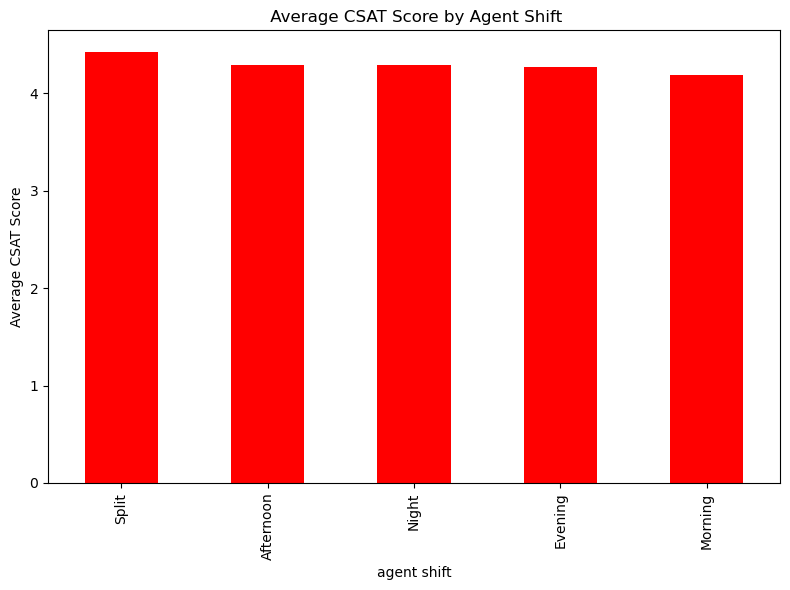

In [23]:
# Plot the sorted bar chart of mean CSAT Scores by Agent Shift
plt.figure(figsize=(8, 6))
df.groupby('Agent Shift')['CSAT Score'].mean().sort_values(ascending=False).plot(kind='bar',color='red')

# Add title and labels to the plot
plt.title(" Average CSAT Score by Agent Shift")  # Updated title to reflect correct subject
plt.xlabel('agent shift')
plt.ylabel("Average CSAT Score")

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


It helps in comparing how csat varies across different times of theday when different shifts are handling customer  queries

Most customers are calling during split time and mostly the data have an even distribution.

**Will the gained insighs help creating positive business impact?**

Are there any insights leading to negative growth? Justify with specific reason

Yes. It helps finding peak time.

**Chart 8**

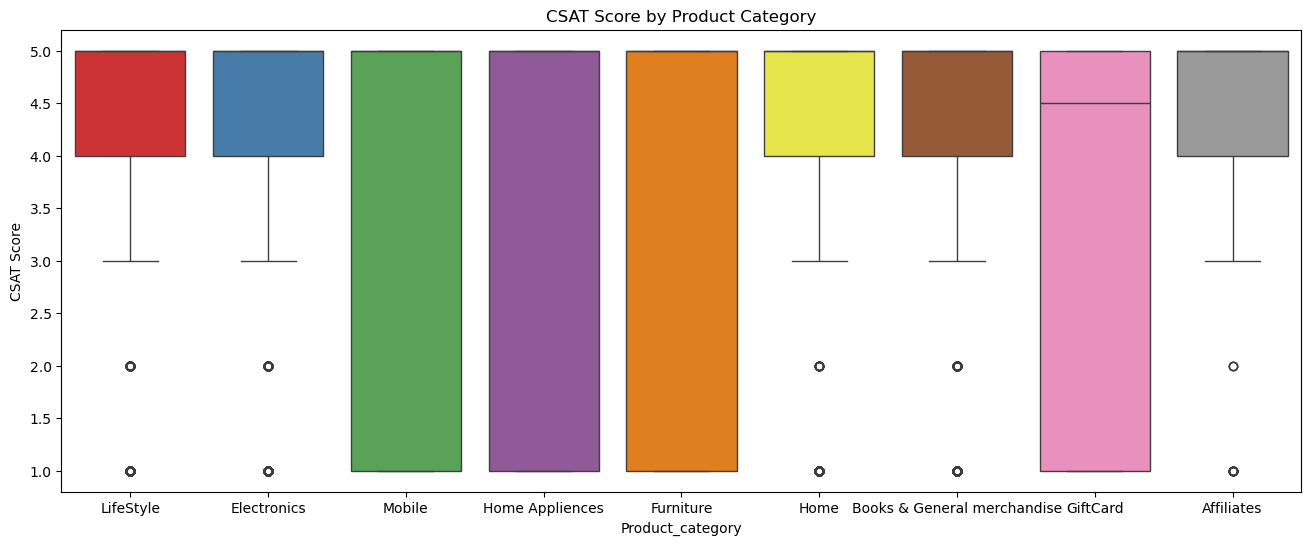

In [28]:
plt.figure(figsize=(16, 6))

sns.boxplot(data=df, x='Product_category', y='CSAT Score', palette='Set1')
plt.title("CSAT Score by Product Category")
plt.xlabel("Product_category")
plt.ylabel("CSAT Score")

plt.show()

The box plot visualises distribution of CSAT scores across different product categories.It helps in understanding the range .median and 
variability of customer satisfaction scores for each product category.

Shows CSAT scores are distributed within each product category including median,quartiles amd potential outliers

**Will the gained insighs help creating positive business impact?**

Are there any insights leading to negative growth? Justify with specific reason

Useful for identifying which product categoriesare performing well but which might require attention or improvement. 

**Chart 9**

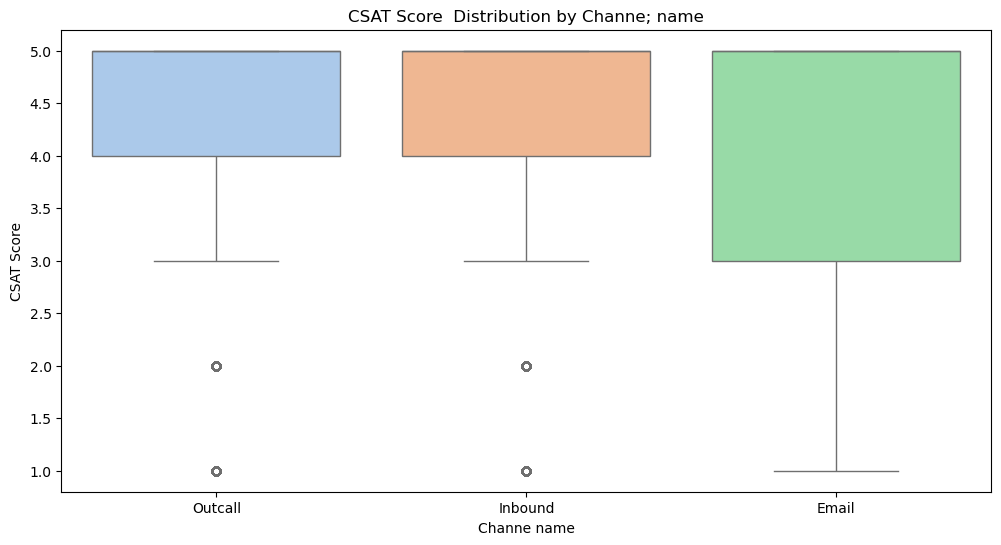

In [30]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='channel_name', y='CSAT Score', palette='pastel')
plt.title("CSAT Score  Distribution by Channe; name")
plt.xlabel("Channe name")
plt.ylabel("CSAT Score")
plt.xticks(rotation=0)
plt.show()

The box plot visualises distribution of CSAT scores across different channels.

Highlights how CSAT scores vary across different customer service channels revealing which channels may require more focus or improvement.

**Will the gained insighs help creating positive business impact?**

Are there any insights leading to negative growth? Justify with specific reason

Shows the most used or frequented channel for customer service and their satisfaction frequency

**Chart 10**

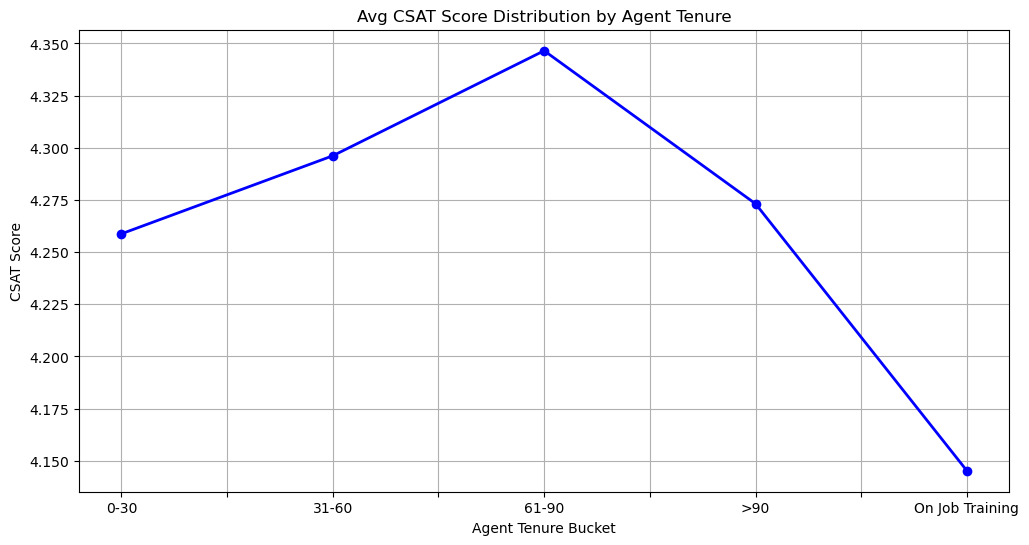

In [34]:
tenure_scores = df.groupby('Tenure Bucket')['CSAT Score'].mean()

# Plot the sorted bar chart of mean CSAT Scores by Tenure Bucket
plt.figure(figsize=(12, 6))
tenure_scores.plot(kind='line',marker='o',color='blue',linewidth=2,linestyle='-')
# Add title and labels to the plot
plt.title("Avg CSAT Score Distribution by Agent Tenure")
plt.xlabel("Agent Tenure Bucket")
plt.ylabel("CSAT Score")

plt.grid(True)
# Display the plot
plt.show()

It visualises trend in avfg csat scores across different tenure buckets

61-90 have highest csat score

**Will the gained insighs help creating positive business impact?**

Are there any insights leading to negative growth? Justify with specific reason

This line plot visualise trends in avg csat scores making it easier to observe any upward or downward trends as agents gain experience

**Chart 11**

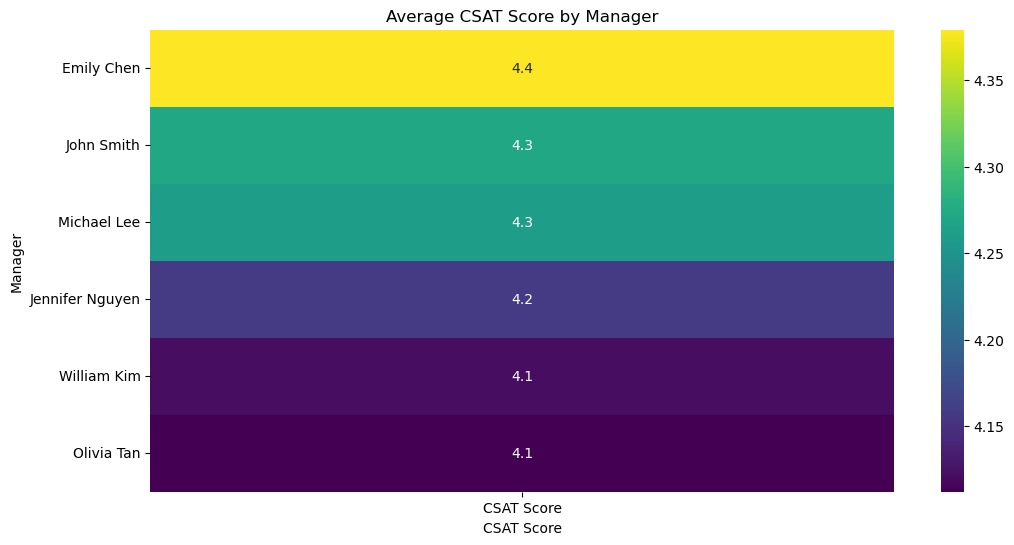

In [40]:
# Calculate the mean CSAT Score for each Manager and sort in descending order
mean_scores = df.pivot_table(index='Manager',values='CSAT Score',aggfunc='mean').sort_values(by='CSAT Score',ascending=False)
plt.figure(figsize=(12, 6))
# Create a bar plot of mean CSAT Scores by Manager
sns.heatmap(mean_scores,annot=True,cmap='viridis',fmt='.1f')
# Add title and rotate x-axis labels for better readability
plt.title("Average CSAT Score by Manager")
plt.xlabel('CSAT Score')
plt.ylabel('Manager')

# Display the plot
plt.show()

Heatmap helps to find the density of a value from the dataset

Emily chen as a manager have highest avg csat score.

**Chart 12**

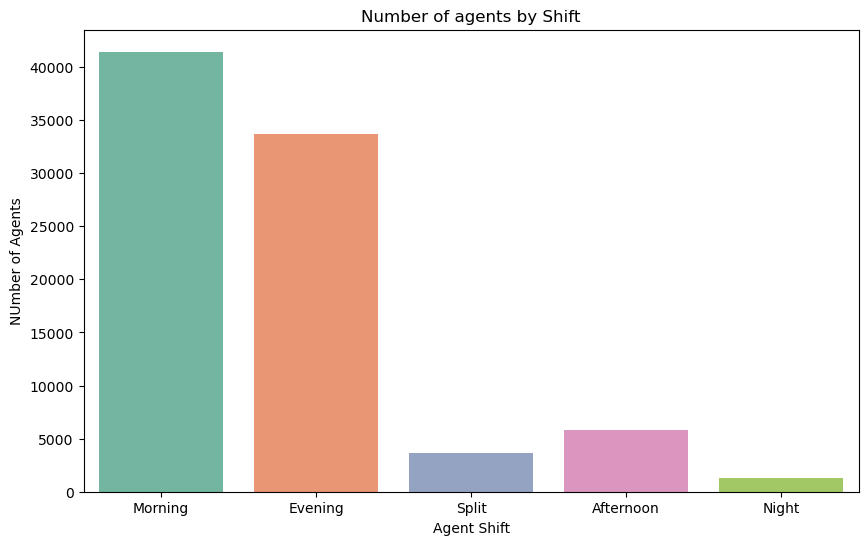

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Agent Shift',data=df,palette='Set2')
plt.title( 'Number of agents by Shift')
plt.xlabel('Agent Shift')
plt.ylabel('NUmber of Agents')
plt.show()

Bar plot shows categorical value of different shifts in total of dataset

On total most people work in mornings and less at nights.

**Will the gained insighs help creating positive business impact?**

Are there any insights leading to negative growth? Justify with specific reason

can be useful when there is a need to balance the agents working each shiftb

**Chart 13**

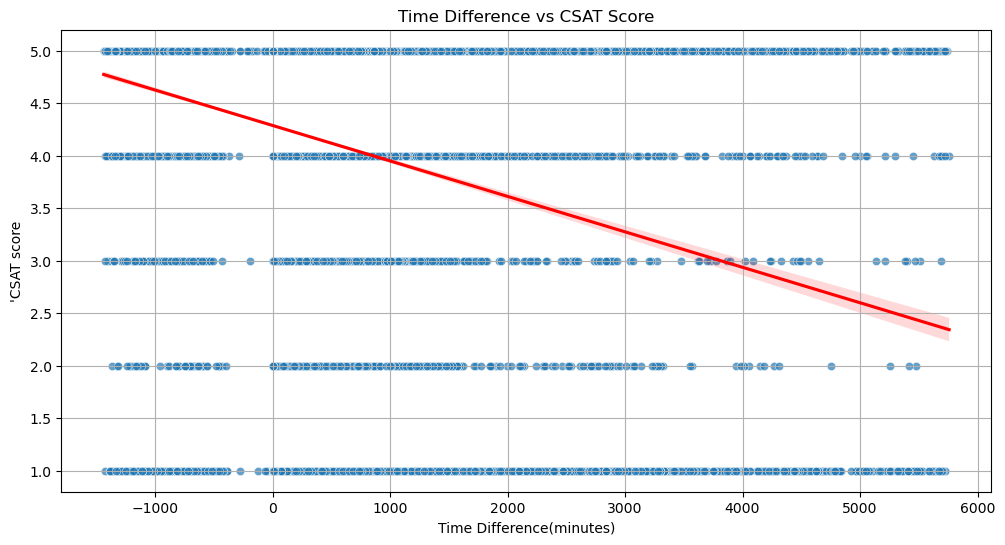

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Time difference', y='CSAT Score', palette='viridis',alpha=0.7)
sns.regplot(data=df, x='Time difference', y='CSAT Score', scatter=False,color='red')
plt.title("Time Difference vs CSAT Score")
plt.xlabel("Time Difference(minutes)")
plt.ylabel("'CSAT score")
plt.grid(True)
plt.show()

In [ ]:
Scatter plot with regression line can help identify any potential relationship bet two variables .Scatter plot displays individual data points 
representing time difference and csat score which helps in visualisising distribution and any potential correlation.Reg line :The red line 
represents the best-fit datapoints showing the trend and direction of the relationship between time difference and csat scores.

In [ ]:
Helps identify if there is positive ,negative or no correlation between time taken to handle issues and csat scores

# **Hypothesis Testing**

Based on chart experiments define 3 hypothetical statements from the datasets

## **Hypothesis testing 1**

**Time difference and CSAT Score**

**Null Hypothesis (H₀):**There is no significant relationship between time difference and CSAT scoreThe time taken to respond to customer 
isseues does not significantly affect customer satisfaction

**Alternate Hypothesis (H₁):** There is significant relationship between time difference and CSAT score. The time taken to respond to customer 
isseues significantly affects customer satisfaction



**Perform apapropriate statistical test**

In [32]:
from scipy.stats import spearmanr
rho,p_value=spearmanr(df['Time difference'],df['CSAT Score'])
print(f'Spearman\'s rank correlation coefficient:{rho}')
print(f'P value:{p_value}')

#interpret results
alpha=0.5
if p_value<alpha:
    print('Reject Null Hypotheis means there is a significant difference between Time difference and CSAT Score')
else:
    print('Accept Null Hypotheis means there is no significant difference between Time difference and CSAT Score')

Spearman's rank correlation coefficient:-0.1776416441206597
P value:0.0
Reject Null Hypotheis means there is a significant difference between Time difference and CSAT Score


**Which statistical test have you done to obtain p value**

Spearman Rank Correlation

**Why did you choose this**

Spearman's rank analyses strength and direction of the association between two ranked variables

## **Hypothesis testing 2**

**CSAT Scores remain constant across Agent Shifts**

**Null Hypothesis (H₀):** The average CSAT score is the same across all agent shifts (e.g., Morning, Afternoon, Night).

**Alternate Hypothesis (H₁):** At least one agent shift has a different average CSAT score.

**Perform apapropriate statistical test**

In [33]:
from scipy.stats import kruskal

groups=[df[df['Agent Shift']==shift]['CSAT Score'] for shift in df['Agent Shift'].unique()]

#perform kruskal-Wallis H test
h_statistic,p_value=kruskal(*groups)
print(f'H Statistic:{h_statistic}')
print(f'P value:{p_value}')

#interpret results
alpha=0.5
if p_value<alpha:
    print('Reject Null Hypotheis means there is a significant difference between Agent shift and CSAT Score')
else:
    print('Accept Null Hypotheis means there is no significant difference between Agent shift and CSAT Score')


H Statistic:151.58004948556504
P value:9.335020551858379e-32
Reject Null Hypotheis means there is a significant difference between Agent shift and CSAT Score


**Which statistical test have you done to obtain p value**

Kruskal-wallis H Statistic

**Why did you choose this**

It is used to determine if there are any statistical significant differencesbetween medians of 3 or more independent groups.A higher 
statistic suggests greater differences between group medians.

## **Hypothesis testing 2**

**Item price and CSAT score**

**Null Hypothesis (H₀):**There is no significant relationship between time differenceItem price and CSAT score

**Alternate Hypothesis (H₁):**There is significant relationship between time differenceItem price and CSAT score

**Perform apapropriate statistical test**

In [34]:
import scipy.stats as stats

#drop cols with nan values in item pric or csat score to ensure correlation
df_clean=df[['Item_price','CSAT Score']].dropna()
item_price=df_clean['Item_price']
csat_score=df_clean['CSAT Score']

corr_coeff,p_value_corr=stats.spearmanr(item_price,csat_score)

#results
print(f'Spearman\'s rank correlation coefficient:{corr_coeff}')
print(f'P value:{p_value_corr}')

alphaa=0.05   # significance level
if p_value<alpha:
    print('Reject Null Hypotheis means there is a significant difference between Item Price and CSAT Score')
else:
    print('Accept Null Hypotheis means there is no significant difference between Item Price and CSAT Score')


Spearman's rank correlation coefficient:-0.09272855529774635
P value:3.568927923149843e-34
Reject Null Hypotheis means there is a significant difference between Item Price and CSAT Score


**Which statistical test have you done to obtain p value**

Spearman Rank Correlation

**Why did you choose this**

This test helps to deermine whether there is significant monotonic relationship between item price  and csat scores

# **Feature Engineering & Data Pre-processing**

## **Handling Missing Values**

In [48]:
df.isnull().sum()

Unique id                   0
channel_name                0
category                    0
Sub-category                0
Order_id                18232
Issue_reported at           0
issue_responded             0
Survey_response_Date        0
Customer_City           68828
Product_category        68711
Item_price              68701
Agent_name                  0
Supervisor                  0
Manager                     0
Tenure Bucket               0
Agent Shift                 0
CSAT Score                  0
Time difference             0
dtype: int64

In [82]:
cols_to_drop=['Item_price','Product_category','Customer_City']
df.drop(columns=[col for col in cols_to_drop if col in df.columns],axis=1,inplace=True)

In [53]:
# Fill missing values in 'Order_id' with 'unknown' since its uniquely identify  each row
df['Order_id'] = df['Order_id'].fillna(method='ffill',inplace=True)

df.head()
df.isnull().sum()

Unique id                   0
channel_name                0
category                    0
Sub-category                0
Order_id                85907
Issue_reported at           0
issue_responded             0
Survey_response_Date        0
Agent_name                  0
Supervisor                  0
Manager                     0
Tenure Bucket               0
Agent Shift                 0
CSAT Score                  0
Time difference             0
dtype: int64

**What all missing value imputation techniques have you used amd why**

Columns cintaining more than 70% null values are dropped from dataframe and the column used to uniquely identify each row is filled with 
order ids gwenerated by backward/forward filling based on the assumption that the same or nearby entries share an order id

# **Handling Outliers**

no of outliers  in 'CSAT Score': 12513
      Agent Shift  CSAT Score
11          Split           1
25        Morning           1
31        Evening           1
32        Morning           1
54      Afternoon           1
...           ...         ...
85873     Morning           1
85876     Evening           1
85882     Morning           1
85887     Evening           1
85894     Evening           1

[12513 rows x 2 columns]


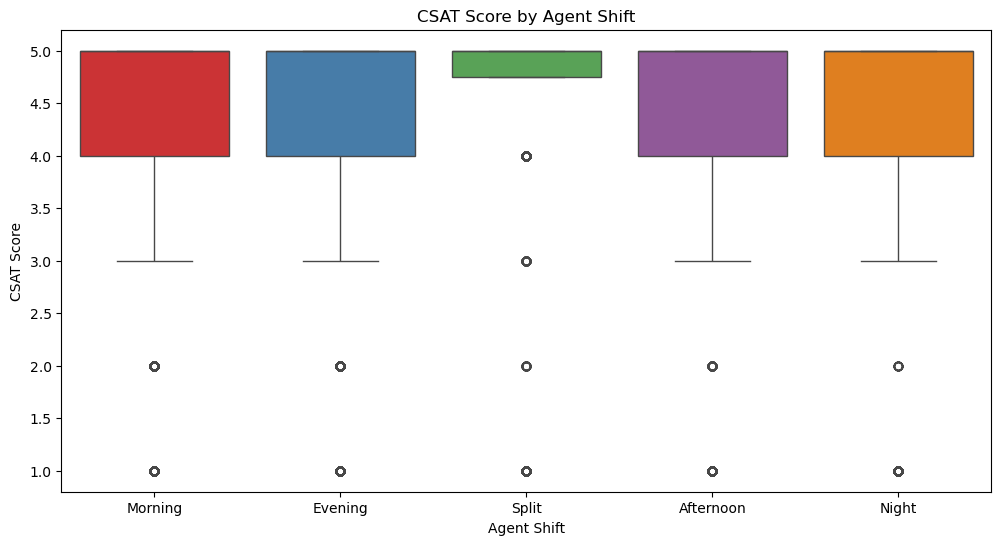

In [59]:
#calculate IQR for CSAT Score
Q1=df['CSAT Score'].quantile(0.25)
Q3=df['CSAT Score'].quantile(0.75)
IQR=Q3-Q1

#define the lower and upper bounds for outliers
LB=Q1-IQR*1.5
UB=Q3+IQR*1.5

outliers=df[(df['CSAT Score']<LB) | (df['CSAT Score']>UB)]
print("no of outliers  in 'CSAT Score':",outliers.shape[0])
print(outliers[['Agent Shift','CSAT Score']])

#plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Agent Shift', y='CSAT Score', palette='Set1')
plt.title('CSAT Score by Agent Shift')
plt.xlabel("Agent Shift")
plt.ylabel("CSAT Score")

plt.show()

**What all outlier techniques have you used amd why**

Capped outlier values to boundary values to get the data even

In [80]:
to_remove=['Unique id' ,'Order_id','Issue_reported at','issue_responded','Issue_reported at(formatted)','issue_responded(formatted)','Survey_response_Date']
df.drop(columns=[col for col in to_remove if col in df.columns],axis=1,inplace=True)

# **Textual Data Preprocessing**

In [81]:
df.head()

,channel_name,category,Sub-category,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Time difference
0,Outcall,Product Queries,Life Insurance,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34.0
1,Outcall,Product Queries,Product Specific Information,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2.0
2,Inbound,Order Related,Installation/demo,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22.0
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20.0
4,Inbound,Cancellation,Not Needed,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2.0


In [36]:
cols_to_clean=['channel_name','category','Sub-category','Agent_name','Supervisor','Manager','Tenure Bucket','Agent Shift']
#convert to lowercase
df[cols_to_clean]=df[cols_to_clean].applymap(lambda x:x.lower() if isinstance(x,str) else x)

**Remove pronounciation**

In [37]:
for col in cols_to_clean:
    if col in df.columns:
        df[col]=df[col].str.replace(f'[{string.punctuationr}]','', regex=True)

NameError: name 'string' is not defined

**Removing URLs and words and digits containing digits**

In [38]:
for col in cols_to_clean:
    if col in df.columns:
        df[col]=df[col].str.replace(r'http\S+|wwww\S+|http\S+','', regex=True)
        df[col]=df[col].str.replace(r'\b\w*\d\w*\b','', regex=True)

**Remove white spaces**

In [39]:
for col in cols_to_clean:
    if col in df.columns:
        df[col]=df[col].str.strip()

df.head()

,Unique id,channel_name,category,Sub-category,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Time difference
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,outcall,product queries,life insurance,c27c9bb4-fa36-4140-9f1f-21009254ffdb,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,NaN,NaN,NaN,richard buchanan,mason gupta,jennifer nguyen,on job training,morning,5,34.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,outcall,product queries,product specific information,d406b0c7-ce17-4654-b9de-f08d421254bd,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,NaN,NaN,NaN,vicki collins,dylan kim,michael lee,>,morning,5,2.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,inbound,order related,installation/demo,c273368d-b961-44cb-beaf-62d6fd6c00d5,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,NaN,NaN,NaN,duane norman,jackson park,william kim,on job training,evening,5,22.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,inbound,returns,reverse pickup enquiry,5aed0059-55a4-4ec6-bb54-97942092020a,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,NaN,NaN,NaN,patrick flores,olivia wang,john smith,>,evening,5,20.0
4,ba903143-1e54-406c-b969-46c52f92e5df,inbound,cancellation,not needed,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,NaN,NaN,NaN,christopher sanchez,austin johnson,michael lee,-,morning,5,2.0


# **Feature Manipulation & Selection**

**Feature manipulation**

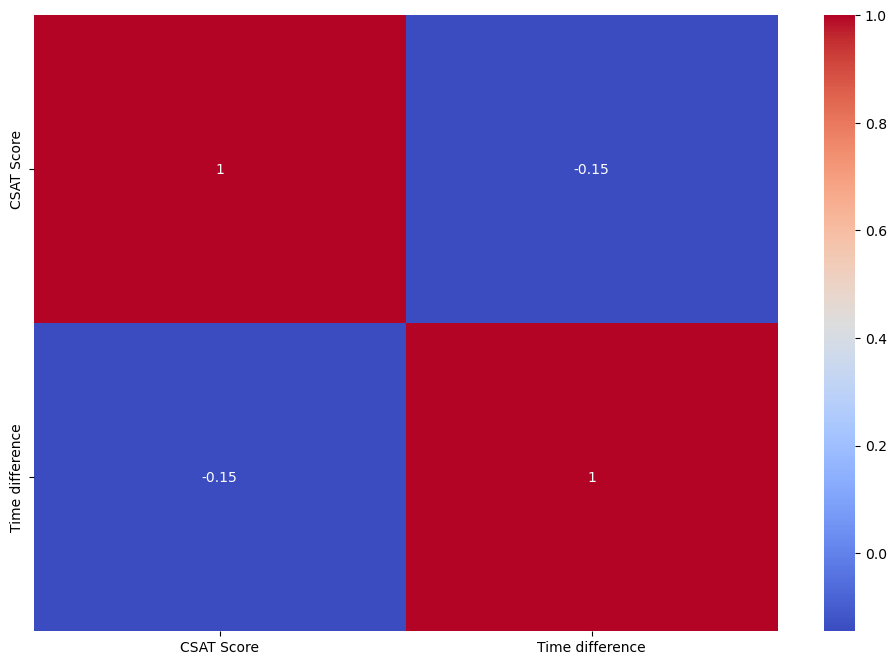

In [94]:
df_numeric=df.select_dtypes(include={float,int})
corr_matrix=df_numeric.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

#Time difference is already calculated

**Feature selection**

**What all feature selection methods u have used and why**

In [ ]:
Correlation matrix has been used to find out which columns have higher connection with csat scores and that is selected

**Which all features you found important and why**

In [ ]:
TIme difference is one feature which has higher connection to csat score n can predict csat score.

# **ML Model Implementation**

**ML model 1**

In [47]:
#Libraries are alraedy imported
from imblearn.over_sampling import SMOTE
#convert continuos csat score into catagories fir classification
df['CSAT Score Category']= pd.cut(df['CSAT Score'],bins=[1,2,3,4,5,6],labels=['Ver poor','Poor','Average','Good','Excellent'])

#use label encoder to categorical features

le=LabelEncoder()
df['channel_name']=le.fit_transform(df['channel_name'])
df['Agent Shift']=le.fit_transform(df['Agent Shift'])
df['CSAT Score Category']=le.fit_transform(df['CSAT Score Category'])

#select features and target variables
X=df[['Time difference','Agent Shift']]
y=df['CSAT Score Category']

#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% of data for testing

#Use smote to oersample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Train the model
model=LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)

#make predictions
y_pred=model.predict(X_test)
print(y_pred)

[1 1 4 ... 1 4 1]


**Explain the ML Model used and its performances using evaluation metric score chart**

In [49]:
'''Logistic regression is used for classyifying tasks.
Amd here the time difference and agent shift is used to predict the casr score since it has the higher correlatiom'''

#Evaluate the model 
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy}')

# classification report
print(classification_report(y_test,y_pred))


Accuracy:0.6005121638924455
              precision    recall  f1-score   support

           0       0.13      0.01      0.02      2277
           1       0.72      0.82      0.77     11934
           2       0.02      0.05      0.03       503
           3       0.01      0.02      0.02       227
           4       0.25      0.21      0.23      2241

    accuracy                           0.60     17182
   macro avg       0.23      0.22      0.21     17182
weighted avg       0.55      0.60      0.57     17182



**Cross Validation and HYperparameter Tuning**

In [57]:
from sklearn.model_selection import cross_val_score,KFold
#split data into k folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
#implement cross validation
cv_results=cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
print(f'Cross-Validation Accuracy:{cv_results.mean()}+-{cv_results.std()}')
                                                      

Cross-Validation Accuracy:0.5926410019202759+-0.02678929248426011


In [60]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
#define parametergrid
param_grid = {
    'C': [0.01,0.1,1,10,100],  # regularisation parameter
    'solver': ['liblinear','saga'] #optimisation algorithm
}
#set grid search cv
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params=grid_search.best_params_
best_score=grid_search.best_score_
print(f'Best Parameters:{best_params}')
print(f'Best Score:{best_score}')

Best Parameters:{'C': 0.1, 'solver': 'liblinear'}
Best Score:0.6872462713714078


**Which hyperparameter optimization  technique have you used and why**

Hyperparameter tuning is finding the best parameters for the model to improve its performance,GridSearchCv is used as hyperparameter optimisation
technique since it works well with classification  algorithms

**Have you seen any improvement?**

Yes.The accuracy score after using grid search cv has went up than initial test of model

# **Conclusion**

**Machine Learning model to create a logistic regression task to predict CSAT score based on features like time differences and agent shift has 
been successfully implemented with an accuracy score of 68%**